# Library

In [90]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,ConfusionMatrixDisplay,RocCurveDisplay,precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc,classification_report
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

import matplotlib.pyplot as plt

import mlflow
import mlflow.sklearn

import pickle


# EDA

In [91]:
fraud_db=pd.read_csv('fraudTest.csv')
fraud_db.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [92]:
print('Number of rows :{}'.format(fraud_db.shape[0]))
print('Number of columns :{}'.format(fraud_db.shape[1]))
print('\n')
display(fraud_db.info())
print('\n')
print('Basics statistics:')
display(fraud_db.describe(include='all'))
print('\n')
print('Percentage of missing values:')
display(display(100 * fraud_db.isnull().sum() / fraud_db.shape[0]))

Number of rows :555719
Number of columns :23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  fl

None



Basics statistics:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719,5.557190e+05,555719,555719,555719.000000,555719,555719,555719,555719,...,555719.000000,555719.000000,5.557190e+05,555719,555719,555719,5.557190e+05,555719.000000,555719.000000,555719.000000
unique,NaN,544760,NaN,693,14,NaN,341,471,2,924,...,NaN,NaN,NaN,478,910,555719,NaN,NaN,NaN,NaN
top,NaN,2020-12-19 16:02:22,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,...,NaN,NaN,NaN,Film/video editor,1977-03-23,2da90c7d74bd46a0caf3777415b3ebd3,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,1859,56370,NaN,11443,12146,304886,1474,...,NaN,NaN,NaN,4119,2408,1,NaN,NaN,NaN,NaN
mean,277859.000000,NaN,4.178387e+17,NaN,NaN,69.392810,NaN,NaN,NaN,NaN,...,38.543253,-90.231325,8.822189e+04,NaN,NaN,NaN,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,NaN,1.309837e+18,NaN,NaN,156.745941,NaN,NaN,NaN,NaN,...,5.061336,13.721780,3.003909e+05,NaN,NaN,NaN,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,NaN,6.041621e+10,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,20.027100,-165.672300,2.300000e+01,NaN,NaN,NaN,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,NaN,1.800429e+14,NaN,NaN,9.630000,NaN,NaN,NaN,NaN,...,34.668900,-96.798000,7.410000e+02,NaN,NaN,NaN,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,NaN,3.521417e+15,NaN,NaN,47.290000,NaN,NaN,NaN,NaN,...,39.371600,-87.476900,2.408000e+03,NaN,NaN,NaN,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,NaN,4.635331e+15,NaN,NaN,83.010000,NaN,NaN,NaN,NaN,...,41.894800,-80.175200,1.968500e+04,NaN,NaN,NaN,1.385867e+09,41.954163,-80.264637,0.000000




Percentage of missing values:


Unnamed: 0               0.0
trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

None

In [93]:
fraud_db.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [94]:
fraud_db['is_fraud'].value_counts().reset_index

<bound method Series.reset_index of is_fraud
0    553574
1      2145
Name: count, dtype: int64>

In [95]:
fraud_db['is_fraud'].value_counts(normalize=True).mul(100).reset_index

<bound method Series.reset_index of is_fraud
0    99.614014
1     0.385986
Name: proportion, dtype: float64>

In [96]:
fraud_db.drop('Unnamed: 0',axis=1)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


# Proprocessing

In [97]:
fraud_db.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [98]:
len(fraud_db.columns)

23

In [99]:
fraud_db['Date']=pd.to_datetime(fraud_db['trans_date_trans_time'],dayfirst=False)
fraud_db['Day'] = fraud_db['Date'].dt.day
fraud_db['Month'] = fraud_db['Date'].dt.month
fraud_db['Year'] = fraud_db['Date'].dt.year
fraud_db['Hour'] = fraud_db['Date'].dt.hour
fraud_db['Minute'] = fraud_db['Date'].dt.minute

fraud_db['Date_ob']=pd.to_datetime(fraud_db['dob'],dayfirst=False)
fraud_db['Day_of_birth'] = fraud_db['Date_ob'].dt.day
fraud_db['Month_of_birth'] = fraud_db['Date_ob'].dt.month
fraud_db['Year_of_birth'] = fraud_db['Date_ob'].dt.year

In [100]:
fraud_db.drop('trans_date_trans_time',axis=1,inplace=True)
fraud_db.drop('Date_ob',axis=1,inplace=True)
fraud_db.drop('dob',axis=1,inplace=True)
fraud_db.drop('Day_of_birth',axis=1,inplace=True)
fraud_db.drop('Date',axis=1,inplace=True)
fraud_db.drop('unix_time',axis=1,inplace=True)
fraud_db.drop('street',axis=1,inplace=True)
fraud_db.drop('Unnamed: 0',axis=1,inplace=True)
fraud_db.drop('trans_num',axis=1,inplace=True)
fraud_db.drop('lat',axis=1,inplace=True)
fraud_db.drop('long',axis=1,inplace=True)

In [101]:
fraud_db.head()

,cc_num,merchant,category,amt,first,last,gender,city,state,zip,...,merch_lat,merch_long,is_fraud,Day,Month,Year,Hour,Minute,Month_of_birth,Year_of_birth
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,Columbia,SC,29209,...,33.986391,-81.200714,0,21,6,2020,12,14,3,1968
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,Altonah,UT,84002,...,39.450498,-109.960431,0,21,6,2020,12,14,1,1990
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,Bellmore,NY,11710,...,40.495810,-74.196111,0,21,6,2020,12,14,10,1970
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,Titusville,FL,32780,...,28.812398,-80.883061,0,21,6,2020,12,15,7,1987
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,Falmouth,MI,49632,...,44.959148,-85.884734,0,21,6,2020,12,15,7,1955


In [102]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "is_fraud"

X = fraud_db.drop(target_variable, axis=1)
Y = fraud_db.loc[:, target_variable]

print("...Done.")
print()

print("Y : ")
print(Y.head())
print()
print("X :")
print(X.head())

Separating labels from features...
...Done.

Y : 
0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

X :
             cc_num                              merchant        category  \
0  2291163933867244                 fraud_Kirlin and Sons   personal_care   
1  3573030041201292                  fraud_Sporer-Keebler   personal_care   
2  3598215285024754  fraud_Swaniawski, Nitzsche and Welch  health_fitness   
3  3591919803438423                     fraud_Haley Group        misc_pos   
4  3526826139003047                 fraud_Johnston-Casper          travel   

     amt   first      last gender        city state    zip  ...  \
0   2.86    Jeff   Elliott      M    Columbia    SC  29209  ...   
1  29.84  Joanne  Williams      F     Altonah    UT  84002  ...   
2  41.28  Ashley     Lopez      F    Bellmore    NY  11710  ...   
3  60.05   Brian  Williams      M  Titusville    FL  32780  ...   
4   3.19  Nathan    Massey      M    Falmouth    MI  49632  ...   

               

In [103]:
# Automatically detect names of numeric/categorical columns
numeric_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = X.select_dtypes(exclude=['number']).columns.tolist()

print("Found numeric features ", numeric_features)
print("Found categorical features ", categorical_features)


Found numeric features  ['cc_num', 'amt', 'zip', 'city_pop', 'merch_lat', 'merch_long', 'Day', 'Month', 'Year', 'Hour', 'Minute', 'Month_of_birth', 'Year_of_birth']
Found categorical features  ['merchant', 'category', 'first', 'last', 'gender', 'city', 'state', 'job']


In [104]:
# Divide dataset Train set & Test set
print("Dividing into train and test sets...")

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)
print("...Done.")
print()


Dividing into train and test sets...
...Done.



In [105]:
# Create pipeline for numeric features
numeric_transformer = StandardScaler()

# Create pipeline for categorical features
categorical_transformer = OneHotEncoder(drop="first",handle_unknown='ignore') 

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [106]:
print("Performing preprocessings on train set...")
print(pd.DataFrame(X_train).head())  # Affichage initial avant transformation
X_train = preprocessor.fit_transform(X_train)
print("...Done.")
print("First 5 rows after preprocessing (Train Set):")
print(X_train[0:5])  # Utilisation correcte pour afficher les premières lignes du tableau NumPy
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(pd.DataFrame(X_test).head())  # Affichage initial avant transformation
X_test = preprocessor.transform(X_test)
print("...Done.")
print("First 5 rows after preprocessing (Test Set):")
print(X_test[0:5, :])
print()

# Pas de preprocessing sur Y_train et Y_test
print("Y_train (First 5 rows):")
print(Y_train.head())  # Pas besoin de transformation

print("Y_test (First 5 rows):")
print(Y_test.head())  # Pas besoin de transformation


Performing preprocessings on train set...
                  cc_num                              merchant       category  \
549254  6011148190095209               fraud_Cummerata-Hilpert  entertainment   
264995      502049568400                  fraud_Hoppe-Parisian      kids_pets   
300656      581686439828   fraud_Denesik, Powlowski and Pouros           home   
524699  6523180720198790  fraud_Baumbach, Hodkiewicz and Walsh   shopping_pos   
249815  3575789281659026                      fraud_Reilly LLC           home   

           amt    first    last gender        city state    zip  ...  \
549254  270.96    Terri  Bailey      F   Daly City    CA  94015  ...   
264995    9.45   Daniel  Melton      M      Marion    CT   6444  ...   
300656  110.52    Larry   House      M  Cochranton    PA  16314  ...   
524699    6.18     Alan  Taylor      M     Oakdale    NY  11769  ...   
249815   62.78  Lindsay  Wilson      F  Centerview    MO  64019  ...   

                           job  merch_

In [107]:
preprocessor_path = "preprocessor.pkl"
with open(preprocessor_path, "wb") as f:
    pickle.dump(preprocessor, f)

print(f"Modèle enregistré sous : {preprocessor_path}")

Modèle enregistré sous : preprocessor.pkl


# Modeling

## Grid Search

In [108]:
# Perform grid search
print("Grid search...")
xgboost = XGBClassifier()

# Grid of values to be tested
params = {
    "max_depth": [2, 4, 6],  # exactly the same role as in scikit-learn
    "min_child_weight": [
        1,
        2,
        3,
    ],  # effect is more or less similar to min_samples_leaf and min_samples_split
    "n_estimators": [
        2,
        4,
        6,
        8,
    ],  # exactly the same role as in scikit-learn
}
print(params)
gridsearch = GridSearchCV(
    xgboost, param_grid=params, cv=3
)  # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)
print()
print("Accuracy on training set : ", gridsearch.score(X_train, Y_train))
print("Accuracy on test set : ", gridsearch.score(X_test, Y_test))


Grid search...
{'max_depth': [2, 4, 6], 'min_child_weight': [1, 2, 3], 'n_estimators': [2, 4, 6, 8]}


2025/03/25 16:58:11 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: INVALID_PARAMETER_VALUE: The experiment 3 must be in the 'active' state. Current state is deleted.


...Done.
Best hyperparameters :  {'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 8}
Best validation accuracy :  0.9981622899082971

Accuracy on training set :  0.9983377382893774
Accuracy on test set :  0.9980205859065716


## XG Boost Model _ V1

In [109]:
best_params = gridsearch.best_params_
print("Best Hyperparameters:", best_params)

xgboost_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
xgboost_model.fit(X_train, Y_train)


Best Hyperparameters: {'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 8}


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:58:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=8, n_jobs=None,
              num_parallel_tree=None, ...)

In [110]:
# Prédictions sur les données de test
y_pred = xgboost_model.predict(X_test)
y_proba = xgboost_model.predict_proba(X_test)[:, 1]  # Pour la courbe ROC

### Validation Metrics

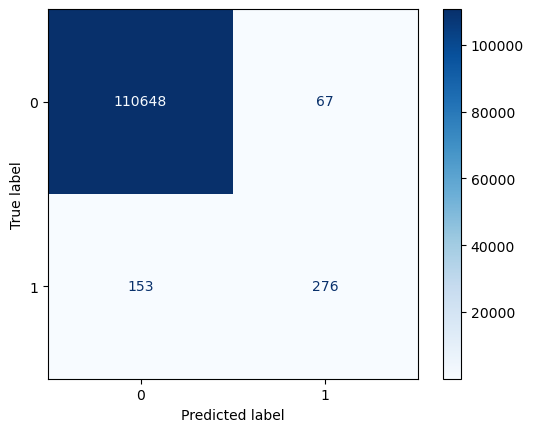

In [111]:
# Matrice de confusion en valeurs absolues
cm = confusion_matrix(Y_test, y_pred)
fig = ConfusionMatrixDisplay(confusion_matrix=cm)
fig.plot(cmap='Blues')

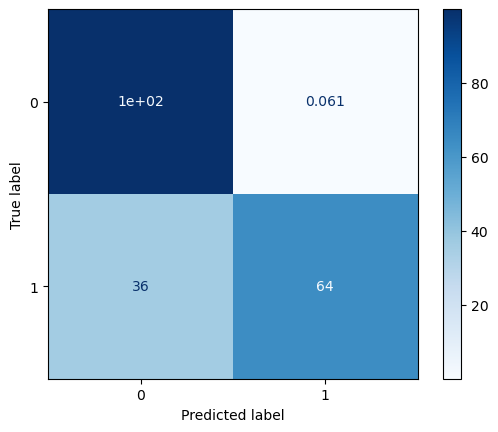

In [112]:
# Matrice de confusion en pourcentage
cm_percentage = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100
fig = ConfusionMatrixDisplay(confusion_matrix=cm_percentage)
fig.plot(cmap='Blues')


In [113]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.80      0.64      0.72       429

    accuracy                           1.00    111144
   macro avg       0.90      0.82      0.86    111144
weighted avg       1.00      1.00      1.00    111144



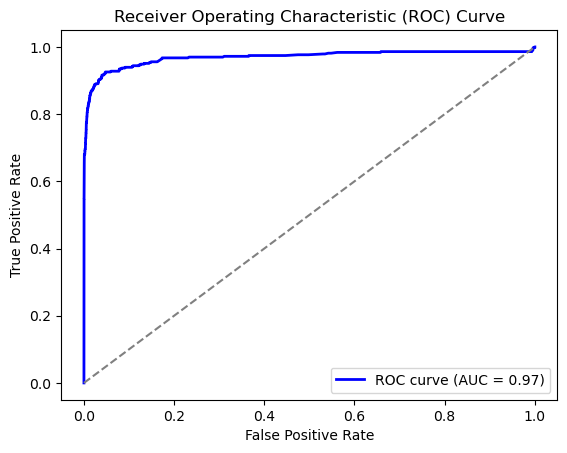

AUC Score: 0.97


In [114]:
# Calcul des valeurs ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {roc_auc:.2f}")

In [115]:
EXPERIMENT_NAME = "Fraud Detection - XGBOOST V1"
mlflow.set_tracking_uri('https://fmendes13-mlflow-fraud-detection.hf.space')
mlflow.set_experiment(EXPERIMENT_NAME)

experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)

mlflow.sklearn.autolog()

with mlflow.start_run(experiment_id=experiment.experiment_id):
    model = xgboost_model
    model.fit(X_train.toarray(), Y_train.values)

    # Predictions
    y_pred = model.predict(X_test.toarray())
    y_proba = model.predict_proba(X_test.toarray())[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    auc_ = roc_auc_score(Y_test, y_proba)

    # Print results
    print("XGBOOST V1 model")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc_:.4f}")

    # Log metrics to MLflow
    mlflow.log_metric("Accuracy", accuracy)
    mlflow.log_metric("Precision", precision)
    mlflow.log_metric("Recall", recall)
    mlflow.log_metric("F1 Score", f1)
    mlflow.log_metric("AUC", auc_)

2025/03/25 16:58:14 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.2, but the installed version is 1.6.1. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:58:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBOOST V1 model
Accuracy: 0.9980
Precision: 0.8047
Recall: 0.6434
F1 Score: 0.7150
AUC: 0.9693
🏃 View run salty-mouse-888 at: https://fmendes13-mlflow-fraud-detection.hf.space/#/experiments/1/runs/ee3f602eb4af453aaf07c22d20bbb818
🧪 View experiment at: https://fmendes13-mlflow-fraud-detection.hf.space/#/experiments/1


In [116]:
"""Le modèle est globalement performant, avec une très bonne capacité de distinction entre les classes (AUC = 0.97).
Cependant, le rappel est relativement faible (0.64). Cela signifie qu'il manque encore certains cas positifs.
La précision est élevée (0.80), ce qui indique que lorsque le modèle prédit un positif, il a souvent raison.
Vous pourriez améliorer davantage le rappel si l'objectif est de détecter plus de cas positifs, par exemple en ajustant le seuil de classification ou en utilisant des techniques de rééquilibrage des classes."""

"Le modèle est globalement performant, avec une très bonne capacité de distinction entre les classes (AUC = 0.97).\nCependant, le rappel est relativement faible (0.64). Cela signifie qu'il manque encore certains cas positifs.\nLa précision est élevée (0.80), ce qui indique que lorsque le modèle prédit un positif, il a souvent raison.\nVous pourriez améliorer davantage le rappel si l'objectif est de détecter plus de cas positifs, par exemple en ajustant le seuil de classification ou en utilisant des techniques de rééquilibrage des classes."

## XG Boost Model - V2 / Rééquilibrage classes

In [117]:
# Calculer scale_pos_weight
scale_pos_weight = len(Y_train[Y_train == 0]) / len(Y_train[Y_train == 1])

# Modèle XGBoost avec scale_pos_weight
xgb_model = XGBClassifier(**best_params, eval_metric='logloss', scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=8, n_jobs=None,
              num_parallel_tree=None, ...)

In [118]:
# Prédictions sur les données de test
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]  # Pour la courbe ROC

### Validation Metrics - V2

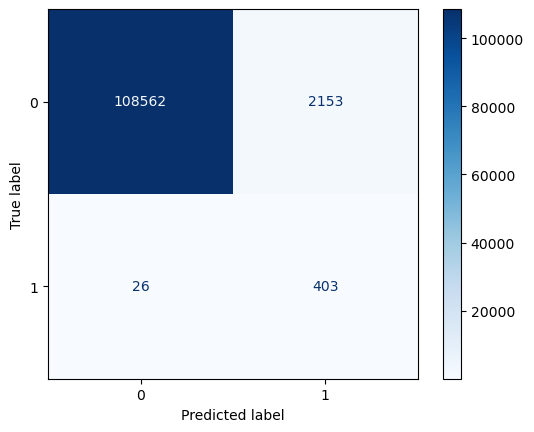

In [119]:
# Matrice de confusion en valeurs absolues
cm = confusion_matrix(Y_test, y_pred)
fig = ConfusionMatrixDisplay(confusion_matrix=cm)
fig.plot(cmap='Blues')

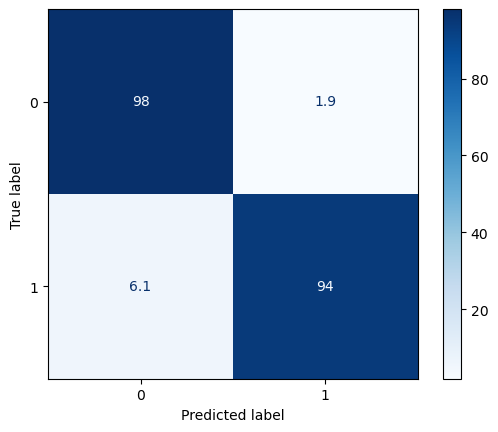

In [120]:
# Matrice de confusion en pourcentage
cm_percentage = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100
fig = ConfusionMatrixDisplay(confusion_matrix=cm_percentage)
fig.plot(cmap='Blues')

In [121]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    110715
           1       0.16      0.94      0.27       429

    accuracy                           0.98    111144
   macro avg       0.58      0.96      0.63    111144
weighted avg       1.00      0.98      0.99    111144



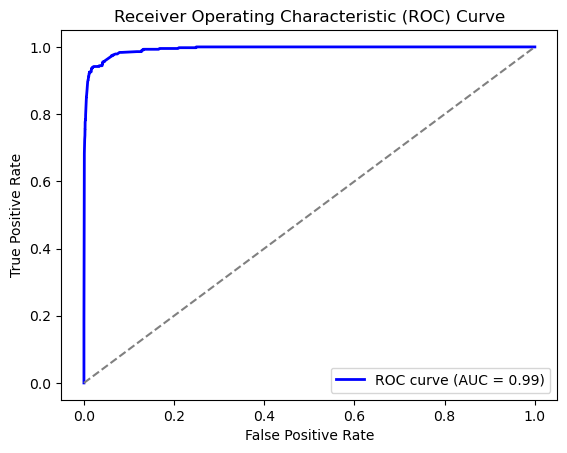

AUC Score: 0.99


In [122]:
# Calcul des valeurs ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {roc_auc:.2f}")

In [126]:
EXPERIMENT_NAME = "Fraud Detection - XGBOOST V4"
mlflow.set_tracking_uri('https://fmendes13-mlflow-fraud-detection.hf.space')
mlflow.set_experiment(EXPERIMENT_NAME)

experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)

mlflow.sklearn.autolog()

with mlflow.start_run(experiment_id=experiment.experiment_id) as run:
    model = xgb_model
    model.fit(X_train.toarray(), Y_train.values)

    y_pred = model.predict(X_test.toarray())
    y_proba = model.predict_proba(X_test.toarray())[:, 1]

    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    auc_ = roc_auc_score(Y_test, y_proba)

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, AUC: {auc_:.4f}")

    mlflow.log_metrics({
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc_
    })

    # Enregistrer le modèle en tant que fichier pickle
    model_path = "xgb_model_v2.pkl"
    with open(model_path, "wb") as f:
        pickle.dump(model, f)

    mlflow.log_artifact(model_path)

    # Enregistrer le modèle avec MLflow
    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="model",
        registered_model_name="XGBoost-Fraud-Detection"
    )

    print(f"Run ID: {run.info.run_id}")

2025/03/25 18:05:38 INFO mlflow.tracking.fluent: Experiment with name 'Fraud Detection - XGBOOST V4' does not exist. Creating a new experiment.
2025/03/25 18:05:39 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.2, but the installed version is 1.6.1. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.


Accuracy: 0.9804, Precision: 0.1577, Recall: 0.9394, F1 Score: 0.2700, AUC: 0.9936
🏃 View run gifted-stork-590 at: https://fmendes13-mlflow-fraud-detection.hf.space/#/experiments/4/runs/08cf9d2162274707b848dc638f46016e
🧪 View experiment at: https://fmendes13-mlflow-fraud-detection.hf.space/#/experiments/4


S3UploadFailedError: Failed to upload xgb_model_v2.pkl to fraud-detection-lead30/4/08cf9d2162274707b848dc638f46016e/artifacts/xgb_model_v2.pkl: An error occurred (InvalidAccessKeyId) when calling the PutObject operation: The AWS Access Key Id you provided does not exist in our records.

In [124]:
model_path = "xgb_model_v2.pkl"
with open(model_path, "wb") as f:
    pickle.dump(xgb_model, f)

print(f"Modèle enregistré sous : {model_path}")

Modèle enregistré sous : xgb_model_v2.pkl


In [41]:
"""Pour détecter efficacement les fraudes (**classe 1**), plusieurs critères doivent être pris en compte. Analysons ensemble :  

### ✅ **Critères à Prioriser pour la Détection de Fraude**
1. **Recall (Rappel)** → **Prioritaire pour les Fraudes**  
    - Le **Recall** mesure la capacité du modèle à détecter les fraudes réelles.  
    - Une fraude non détectée peut avoir des conséquences graves, donc un **Recall élevé** est crucial.  
2. **Precision (Précision)**  
    - La **Precision** indique la proportion des fraudes détectées qui sont réellement des fraudes.  
    - Un faible score de précision signifie plus de **faux positifs**, ce qui pourrait entraîner des vérifications inutiles.  
3. **F1-Score**  
    - Le **F1-Score** est un équilibre entre la Précision et le Recall. Il est utile lorsque vous devez considérer les deux métriques.  

---

## 📊 **Comparaison des Modèles sur la Classe 1 (Fraude)**

| **Métrique** | **Modèle 1** | **Modèle 2** | **Commentaire** |
|----------------|--------------|--------------|-----------------|
| **Recall**     | **0.64**     | **0.94**     | Le modèle 2 détecte beaucoup plus de fraudes. |
| **Precision**  | **0.80**     | **0.16**     | Le modèle 1 a moins de faux positifs. |
| **F1-Score**   | **0.72**     | **0.27**     | Le modèle 1 est plus équilibré, mais le modèle 2 reste plus agressif. |
| **Accuracy**   | **1.00**     | **0.98**     | L’accuracy n’est pas pertinente dans un problème déséquilibré. |
| **Macro Avg**  | **0.86**     | **0.63**     | Le modèle 1 a une meilleure performance globale. |

---

## 🟢 **Conclusion**
- **Si votre priorité est de minimiser les faux négatifs (fraudes non détectées)** :  
  → **Modèle 2** est plus pertinent, car il atteint un Recall de **0.94**.  
  Il est idéal si vous êtes prêt à accepter plus de faux positifs et à gérer manuellement certaines vérifications.  

- **Si vous cherchez un équilibre entre faux positifs et faux négatifs** :  
  → **Modèle 1** est plus pertinent, car il maintient une meilleure précision (**0.80**) et un bon F1-Score (**0.72**).  
  C’est un bon choix si les coûts d’une fausse alerte sont élevés.  

---

🎯 **Recommandation**  
- Si l’objectif est de **maximiser la détection des fraudes à tout prix**, choisissez le **Modèle 2**.  
- Si vous avez des ressources limitées pour gérer les faux positifs, le **Modèle 1** est plus adapté.  
"""

'Pour détecter efficacement les fraudes (**classe 1**), plusieurs critères doivent être pris en compte. Analysons ensemble :  \n\n### ✅ **Critères à Prioriser pour la Détection de Fraude**\n1. **Recall (Rappel)** → **Prioritaire pour les Fraudes**  \n    - Le **Recall** mesure la capacité du modèle à détecter les fraudes réelles.  \n    - Une fraude non détectée peut avoir des conséquences graves, donc un **Recall élevé** est crucial.  \n2. **Precision (Précision)**  \n    - La **Precision** indique la proportion des fraudes détectées qui sont réellement des fraudes.  \n    - Un faible score de précision signifie plus de **faux positifs**, ce qui pourrait entraîner des vérifications inutiles.  \n3. **F1-Score**  \n    - Le **F1-Score** est un équilibre entre la Précision et le Recall. Il est utile lorsque vous devez considérer les deux métriques.  \n\n---\n\n## 📊 **Comparaison des Modèles sur la Classe 1 (Fraude)**\n\n| **Métrique** | **Modèle 1** | **Modèle 2** | **Commentaire** |\n|-